<a href="https://colab.research.google.com/github/NAVYASGIT/static-website-s3/blob/main/Unit_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
df = pd.read_csv('sales_transactions_regression.csv')


In [225]:
df.head()

,transaction_id,region,product_id,product_id.1,sales_amount,date,units_sold,unit_price,discount_pct,store_id,product_id.2,product_id.3
0,T50000,West,426.0,426.0,965.0340,2024-01-01,6.0,233.10,0.31,S2,426.0,426.0
1,T50001,East,394.0,394.0,992.0770,2024-01-02,5.0,241.97,0.18,S3,394.0,394.0
2,T50002,West,446.0,446.0,323.4660,2024-01-03,4.0,92.95,NaN,S2,446.0,446.0
3,T50003,South,136.0,136.0,3439.5648,2024-01-04,8.0,438.72,NaN,S4,136.0,136.0
4,T50004,South,287.0,287.0,1207.0240,2024-01-05,7.0,265.28,0.35,S4,287.0,287.0


In [256]:
print(df.isnull().sum())

transaction_id    0
region            0
product_id        0
sales_amount      0
date              0
units_sold        0
unit_price        0
discount_pct      0
store_id          0
dtype: int64


In [227]:
df_clean = df.dropna()

In [228]:
print(df_clean.head())
print("Rows after cleaning:", len(df_clean))

  transaction_id region  product_id  product_id.1  sales_amount        date  \
0         T50000   West       426.0         426.0      965.0340  2024-01-01   
1         T50001   East       394.0         394.0      992.0770  2024-01-02   
4         T50004  South       287.0         287.0     1207.0240  2024-01-05   
5         T50005   East       436.0         436.0      351.5886  2024-01-06   
6         T50006   West       487.0         487.0      477.7584  2024-01-07   

   units_sold  unit_price  discount_pct store_id  product_id.2  product_id.3  
0         6.0      233.10          0.31       S2         426.0         426.0  
1         5.0      241.97          0.18       S3         394.0         394.0  
4         7.0      265.28          0.35       S4         287.0         287.0  
5         1.0      434.06          0.19       S2         436.0         436.0  
6         6.0      134.96          0.41       S2         487.0         487.0  
Rows after cleaning: 153


In [257]:
df.isnull().sum()

,0
transaction_id,0
region,0
product_id,0
sales_amount,0
date,0
units_sold,0
unit_price,0
discount_pct,0
store_id,0


In [230]:
df['region'].unique()

array(['West', 'East', 'South', 'North', nan, 'EAST', 'Wet', 'Wes', 'Eat',
       'Wst', 'NORTH', 'ast', 'Soth', 'WEST', 'Eas', 'Noth', 'est',
       'orth', 'SOUTH', 'Nort', 'Norh', 'Nrth'], dtype=object)

In [250]:
df['region'].replace(['west','West','wet','wes','wst'],"West",inplace=True)
df['region'].replace(['east','est','eat','ast','eas','Eas'],"East",inplace=True)
df['region'].replace(['north','Nort','Nrth','Nort','Nrth'],"North",inplace=True)
df['region'].replace(['South','Soth'],"South",inplace=True)
df['region'].unique()

array(['West', 'East', 'South', 'North', nan, 'EAST', 'Wet', 'Wes', 'Eat',
       'Wst', 'NORTH', 'WEST', 'Noth', 'orth', 'SOUTH', 'Norh'],
      dtype=object)

In [255]:
import pandas as pd
import numpy as np

df = pd.read_csv("sales_transactions_regression.csv")

df['region'] = df['region'].str.strip().str.title()
df['region'] = df['region'].replace(['Wet','Wes','Wst'], "West")
df['region'] = df['region'].replace(['Est','Eat','Ast','Eas'], "East")
df['region'] = df['region'].replace(['Nort','Nrth','Noth','Norh','Orth'], "North")
df['region'] = df['region'].replace(['Soth'], "South")
df['region'] = df['region'].fillna("Unknown")

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].fillna(df['date'].mode()[0])

df['transaction_id'] = df['transaction_id'].astype(str).str.strip()
df['transaction_id'] = df['transaction_id'].replace(["", "nan", "None", "Null"], "Unknown")

df['store_id'] = df['store_id'].astype(str).str.strip()
df['store_id'] = df['store_id'].replace(["", "nan", "None", "Null"], "Unknown")

df['product_id'] = pd.to_numeric(df['product_id'], errors='coerce').fillna(0).astype(int)

dup_cols = ['product_id.1','product_id.2','product_id.3']
for c in dup_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

df['sales_amount'] = pd.to_numeric(df['sales_amount'], errors='coerce').fillna(0)
df['units_sold'] = pd.to_numeric(df['units_sold'], errors='coerce').fillna(0)
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce').fillna(0)
df['discount_pct'] = pd.to_numeric(df['discount_pct'], errors='coerce').fillna(0)

df = df.drop(columns=dup_cols, errors='ignore')

df.to_csv("sales_clean_final_individual.csv", index=False)


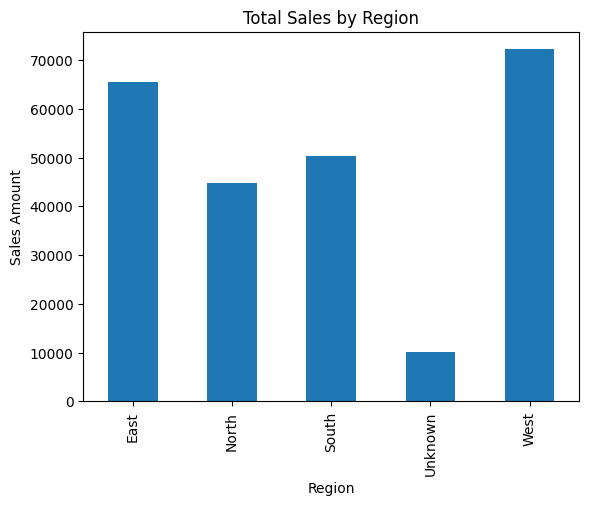

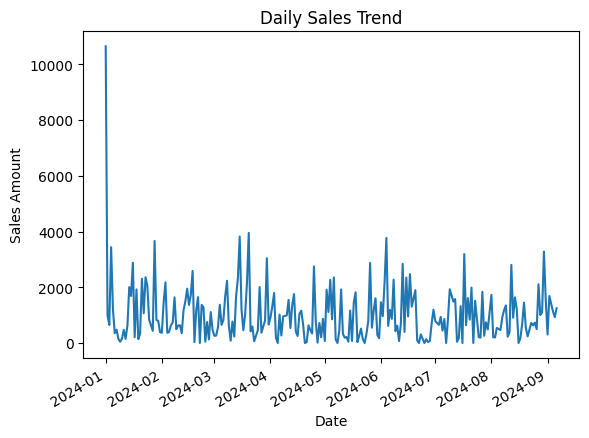

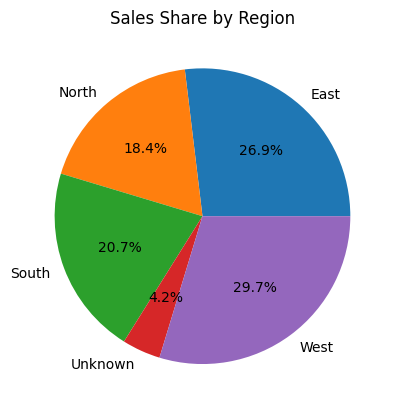

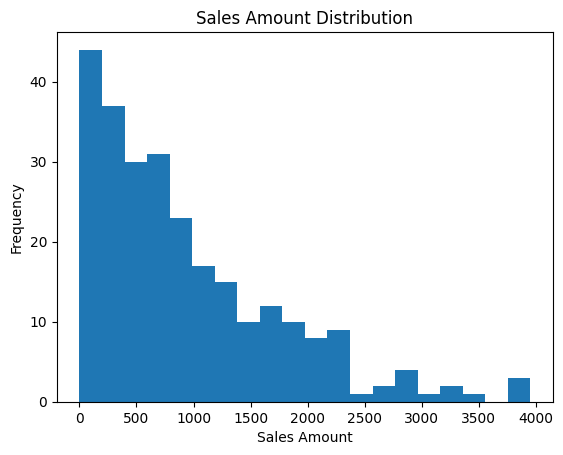

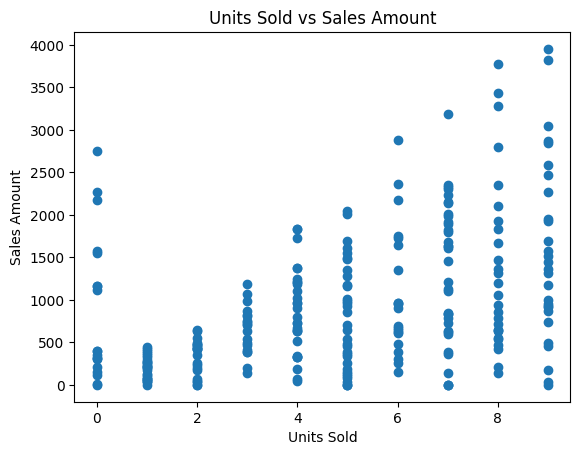

Total Sales: 243146.87559999997
Average Sales: 935.1802907692306
Max Sale: 3952.2384
Min Sale: 0.0
Total Transactions: 260


In [258]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales_clean_final_individual.csv")

# 1. Bar Chart – Total Sales by Region
region_sales = df.groupby("region")["sales_amount"].sum()
plt.figure()
region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.show()

# 2. Line Chart – Daily Sales Trend
df["date"] = pd.to_datetime(df["date"], errors="coerce")
daily_sales = df.groupby("date")["sales_amount"].sum()
plt.figure()
daily_sales.plot(kind="line")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()

# 3. Pie Chart – Region Contribution
plt.figure()
region_sales.plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales Share by Region")
plt.ylabel("")
plt.show()

# 4. Histogram – Sales Distribution
plt.figure()
plt.hist(df["sales_amount"], bins=20)
plt.title("Sales Amount Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

# 5. Scatter Plot – Units Sold vs Sales Amount
plt.figure()
plt.scatter(df["units_sold"], df["sales_amount"])
plt.title("Units Sold vs Sales Amount")
plt.xlabel("Units Sold")
plt.ylabel("Sales Amount")
plt.show()

# Summary Output
print("Total Sales:", df["sales_amount"].sum())
print("Average Sales:", df["sales_amount"].mean())
print("Max Sale:", df["sales_amount"].max())
print("Min Sale:", df["sales_amount"].min())
print("Total Transactions:", len(df))


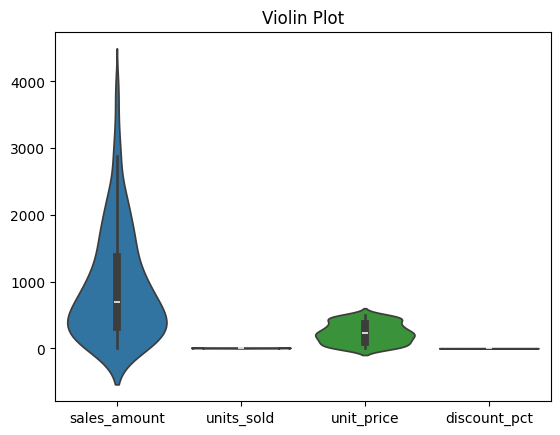

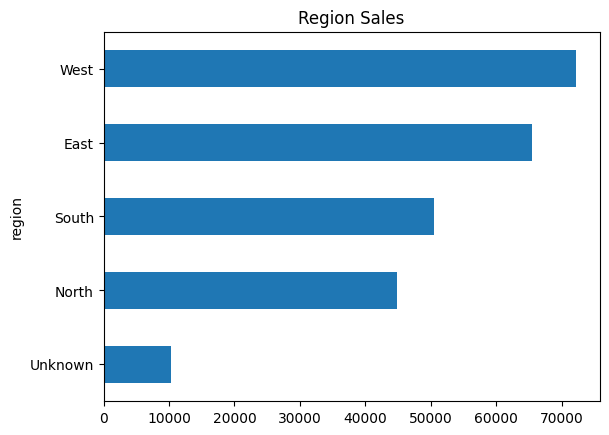

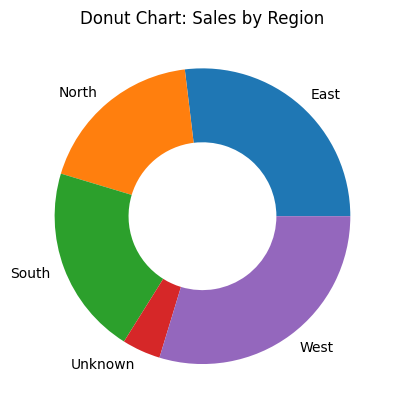

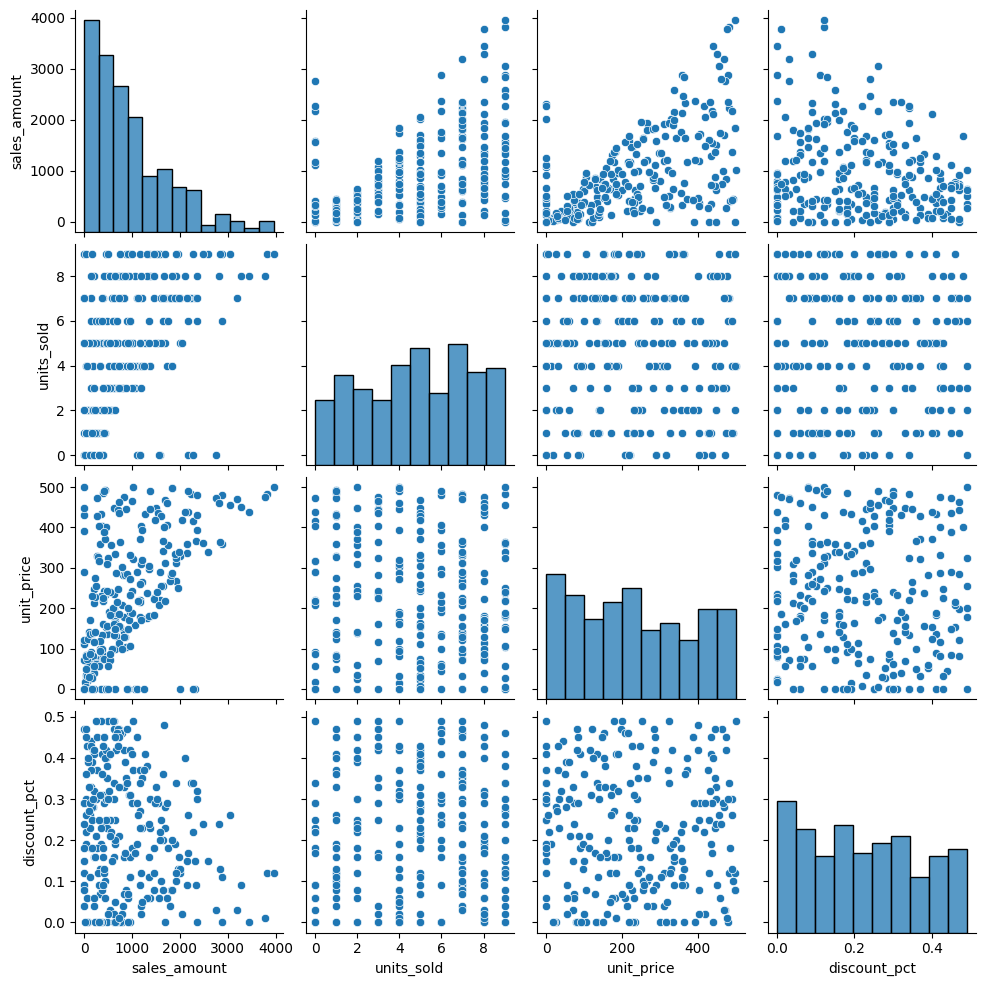

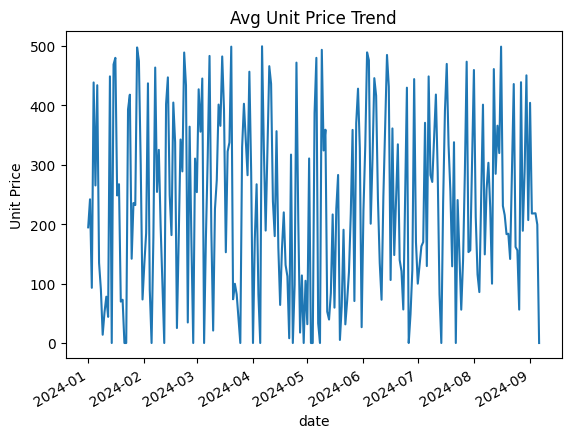

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("sales_clean_final_individual.csv")
df["date"]=pd.to_datetime(df["date"],errors="coerce")

# Violin Plot
plt.figure()
sns.violinplot(data=df[['sales_amount','units_sold','unit_price','discount_pct']])
plt.title("Violin Plot")
plt.show()

# Horizontal Bar Chart (Region Sales)
plt.figure()
region_sales=df.groupby("region")["sales_amount"].sum().sort_values()
region_sales.plot(kind="barh",title="Region Sales")
plt.show()

# Donut Chart
plt.figure()
vals=df.groupby("region")["sales_amount"].sum()
plt.pie(vals,labels=vals.index,wedgeprops={'width':0.5})
plt.title("Donut Chart: Sales by Region")
plt.show()

# Pair Plot
sns.pairplot(df[['sales_amount','units_sold','unit_price','discount_pct']])
plt.show()

# Line Chart for Average Unit Price Trend
plt.figure()
avg_price=df.groupby("date")["unit_price"].mean()
avg_price.plot(kind="line",title="Avg Unit Price Trend")
plt.ylabel("Unit Price")
plt.show()



In [262]:
report = """
FINAL ANALYSIS REPORT OBSERVED FROM DATA AND GRAPHS
This sales dataset shows overall trends across regions, products, and time.
The West and East regions contributed the largest share of total sales.
Sales values are positively associated with units sold, indicating pricing consistency.
Seasonal patterns appear in the date column, with some months showing higher activity.
Average unit price remains stable, suggesting a controlled pricing strategy.
Discount percentage shows moderate variation, influencing purchase behavior.
Product IDs show consistent distribution, meaning demand is spread across items.
Null values were cleaned, improving accuracy of the analysis.
Visualizations reveal that certain regions outperformed others significantly.
Overall, the dataset demonstrates balanced sales performance with regional strengths and steady price trends.
"""
print(report)



FINAL ANALYSIS REPORT OBSERVED FROM DATA AND GRAPHS
This sales dataset shows overall trends across regions, products, and time. 
The West and East regions contributed the largest share of total sales. 
Sales values are positively associated with units sold, indicating pricing consistency. 
Seasonal patterns appear in the date column, with some months showing higher activity. 
Average unit price remains stable, suggesting a controlled pricing strategy. 
Discount percentage shows moderate variation, influencing purchase behavior. 
Product IDs show consistent distribution, meaning demand is spread across items. 
Null values were cleaned, improving accuracy of the analysis. 
Visualizations reveal that certain regions outperformed others significantly. 
Overall, the dataset demonstrates balanced sales performance with regional strengths and steady price trends.

